In [17]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [18]:
from keras.datasets import mnist
(x_train_image, y_train_label),\
(x_test_image, y_test_label) = mnist.load_data()

In [19]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test  = x_test_image.reshape(10000, 784).astype('float32')

In [20]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [21]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot  = np_utils.to_categorical(y_test_label)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Dense(units = 1000,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [25]:
model.add(Dropout(0.5))

In [26]:
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

In [27]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [29]:
train_history = model.fit(x = x_Train_normalize,
                          y = y_Train_OneHot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.3565 - acc: 0.8943 - val_loss: 0.1619 - val_acc: 0.9552
Epoch 2/10
 - 6s - loss: 0.1602 - acc: 0.9533 - val_loss: 0.1167 - val_acc: 0.9655
Epoch 3/10
 - 6s - loss: 0.1163 - acc: 0.9651 - val_loss: 0.0986 - val_acc: 0.9708
Epoch 4/10
 - 6s - loss: 0.0924 - acc: 0.9728 - val_loss: 0.0908 - val_acc: 0.9720
Epoch 5/10
 - 5s - loss: 0.0755 - acc: 0.9776 - val_loss: 0.0820 - val_acc: 0.9753
Epoch 6/10
 - 6s - loss: 0.0628 - acc: 0.9805 - val_loss: 0.0776 - val_acc: 0.9762
Epoch 7/10
 - 6s - loss: 0.0539 - acc: 0.9841 - val_loss: 0.0782 - val_acc: 0.9770
Epoch 8/10
 - 6s - loss: 0.0485 - acc: 0.9853 - val_loss: 0.0734 - val_acc: 0.9778
Epoch 9/10
 - 6s - loss: 0.0438 - acc: 0.9860 - val_loss: 0.0688 - val_acc: 0.9795
Epoch 10/10
 - 5s - loss: 0.0376 - acc: 0.9887 - val_loss: 0.0670 - val_acc: 0.9805


In [30]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

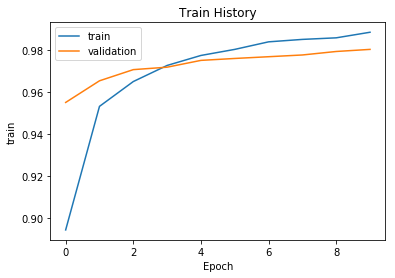

In [31]:
show_train_history(train_history, 'acc', 'val_acc')

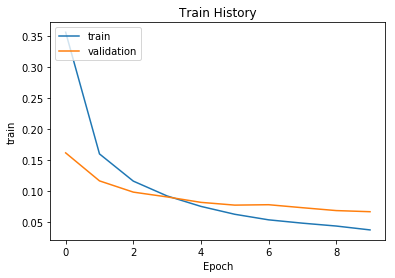

In [32]:
show_train_history(train_history, 'loss', 'val_loss')

In [33]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy =', scores[1])

10000/10000 [==============================] - 1s 70us/step

accuracy = 0.9805


In [41]:
prediction = model.predict_classes(x_Test)

In [42]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [44]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

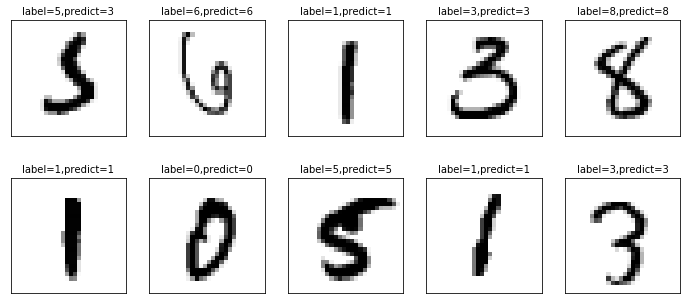

In [45]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

In [46]:
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1007,2,2,0,2,4,9,0
3,0,0,4,993,0,0,0,3,6,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,17,1,853,7,1,7,3
6,7,3,2,1,3,3,937,0,2,0
7,0,5,12,7,1,0,0,988,7,8
8,5,0,3,5,2,1,1,2,954,1


In [47]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [48]:
df[(df.label == 5)&(df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4255,5,3
